Rui Wang 1007791695

# Homework #2 Part I: <br>Prove that as a function of $\theta$...

---

$$
\begin{align*}
&\color{white}{\propto}{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

### Hint: expand the squares, and rebuild the quadratic in terms of $\theta$...

$$
\begin{align*}
\\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

We assume that:
$$
\mu=\frac{\tau \theta_0+\phi \sum_{i=1}^n x_i}{\tau+n \phi}
$$

We expand the square:
$$
(\theta-\mu)^2=\theta^2-2 \theta \mu+\mu^2
$$

We put $\mu$ into the expanded function:
$$
\theta^2-2 \theta \frac{\tau \theta_0+\phi \sum_{i=1}^n x_i}{\tau+n \phi}+\left(\frac{\tau \theta_0+\phi \sum_{i=1}^n x_i}{\tau+n \phi}\right)^2
$$

We multiply through by $-\frac{1}{2}(\tau+n \phi)$：
$$
-\frac{1}{2}(\tau+n \phi) \theta^2+\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right) \theta-\frac{1}{2}\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right)^2\left(\frac{1}{\tau+n \phi}\right)
$$

We rebuild the quadratic in terms of $\theta$:
$$
\exp\left(-\frac{1}{2}(\tau+n \phi) \theta^2+\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right) \theta-\frac{1}{2}\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right)^2\left(\frac{1}{\tau+n \phi}\right)\right)
$$


# The "Classic Bayes" Figure [15 minutes]

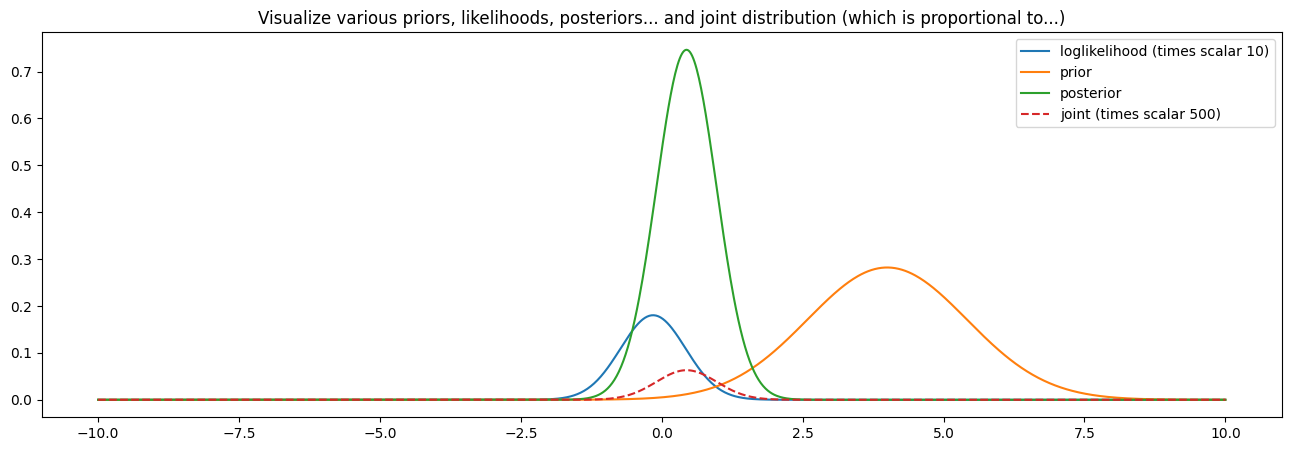

In [ ]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001);
likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape),
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
c,c2 = 500,10;
joint = c*likelihood*prior # elementwise multiplication
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
plt.figure(figsize=(16,5)); plt.plot(parameter_domain, c2*likelihood, label="loglikelihood (times scalar "+str(c2)+")"); plt.plot(parameter_domain, prior, label="prior"); plt.plot(parameter_domain, posterior, label="posterior"); plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")"); plt.legend(); plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)");

# Homework #2 Part II: Complete the following...

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     
2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    
3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?
4. What's the difference between a ***log likelihood*** and ***log posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***log of the marginal likelihood constant***. [Or, another way to start thinking about this is to instead as the question: What's the difference between a ***likelihood*** and ***posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***marginal likelihood constant***.]

<!-- posterior proporitional to joint... -->

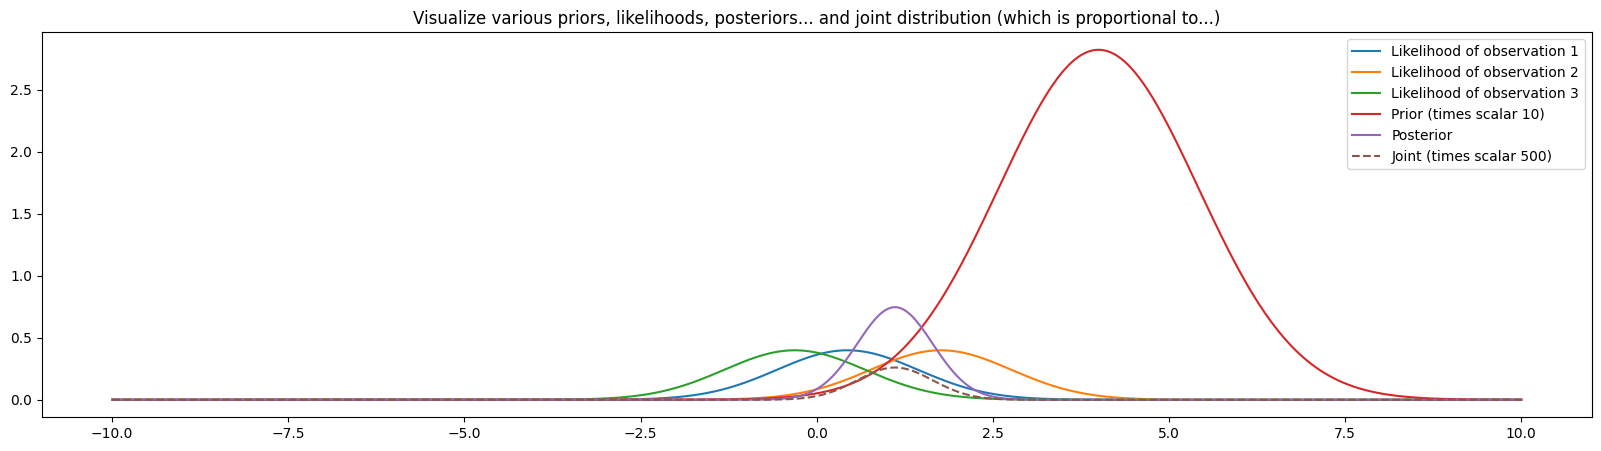

In [ ]:
# Question 1
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001);

likelihoods = [stats.norm.pdf(parameter_domain, loc=xi, scale=1) for xi in x]

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

joint = 500 * np.prod(likelihoods, axis=0) * prior

posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)

plt.figure(figsize=(20, 5))

for i, individual_likelihood in enumerate(likelihoods):
    plt.plot(parameter_domain, individual_likelihood, label=f"Likelihood of observation {i+1}")

plt.plot(parameter_domain, 10*prior, label="Prior (times scalar 10)")
plt.plot(parameter_domain, posterior, label="Posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="Joint (times scalar 500)")

plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")

plt.show()

In [ ]:
print(x)

[ 0.43614481  1.76259419 -0.31237102]


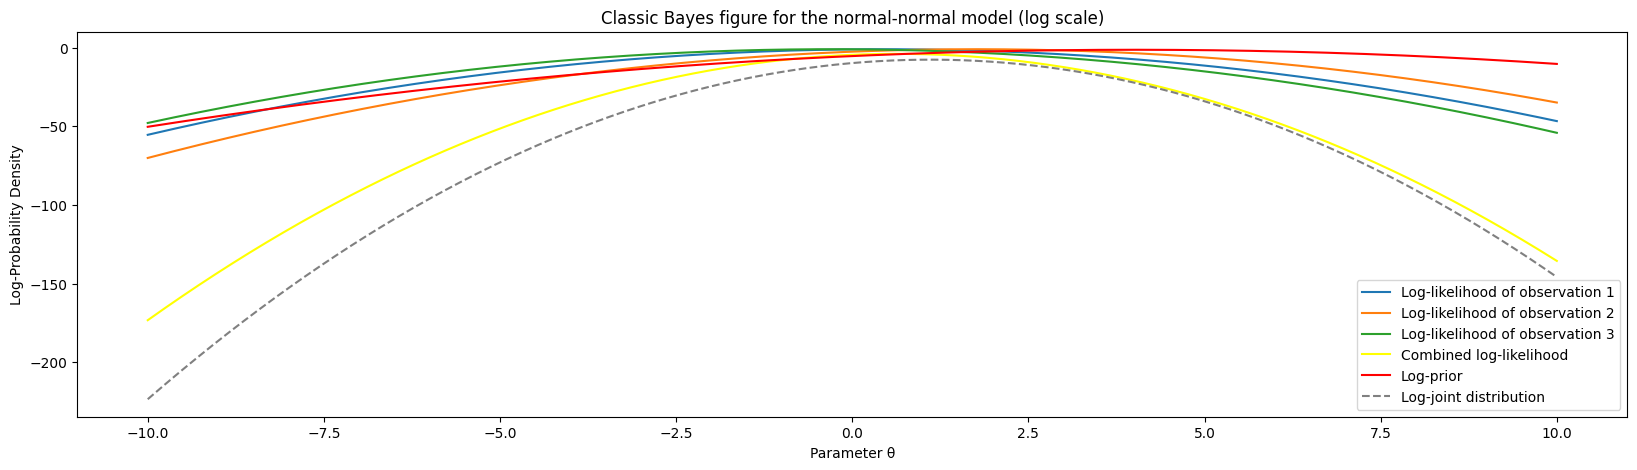

In [ ]:
# Question 2
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3; theta_0,tau = 4,1/2; phi = 1; parameter_domain = np.linspace(-10,10,1001);

log_likelihoods = np.array([stats.norm.logpdf(xi, loc=parameter_domain, scale=1/phi**0.5) for xi in x])

combined_log_likelihood = log_likelihoods.sum(axis=0)

log_prior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)

log_joint = combined_log_likelihood + log_prior

plt.figure(figsize=(20, 5))

for i, log_likelihood in enumerate(log_likelihoods):
    plt.plot(parameter_domain, log_likelihood, label=f"Log-likelihood of observation {i+1}")

plt.plot(parameter_domain, combined_log_likelihood, label="Combined log-likelihood", color='yellow')
plt.plot(parameter_domain, log_prior, label="Log-prior", color='red')
plt.plot(parameter_domain, log_joint, label="Log-joint distribution", color='gray', linestyle='--')

plt.legend()
plt.title("Classic Bayes figure for the normal-normal model (log scale)")
plt.xlabel("Parameter θ")
plt.ylabel("Log-Probability Density")

plt.show()

# Question 3
Normal Likelihood:
$$
p(x \mid \theta, \phi)=\prod_{i=1}^n \sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_i-\theta\right)^2}
$$

The Uniform Prior $p(\theta) \propto 1$, the posterior distribution $p(\theta \mid x)$ is proportional to the likelihood function:
$$
p(\theta \mid x) \propto \prod_{i=1}^n \sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_i-\theta\right)^2}
$$

The Posterior distribution: (This is my guess result)
$$
\theta \mid x \sim \mathcal{N}\left(\bar{x}, \ 1 / \left( n*\phi\right)\right)
$$
Sample mean: $\bar{x}$ \
Sample variance: $ 1 / \phi$ = ($\sigma^2$) \
The number of observations: $n$

# Question 4
For Log Likelihood:
When the improper prior is used, the Log Likelihood does not involve the prior, which means that the Log Likelihood is unaffected by the improper prior. It's only the parameters.

For Log Posterior:
When an improper prior is used, the log posterior includes the log of the marginal likelihood constant.

The marginal likelihood constants are used to normalize the posterior to ensure it integrates to one and forms a valid probability distribution. The marginal likelihood constants also called evidence.

Finally, the use of improper priors requires careful consideration of the marginal likelihood to ensure that the resulting posterior is a valid probability distribution. And, the most important thing is that we need to ensure the log likelihood remains unchanged whatever the prior used.
